### Gerando data sensível falsa.

In [24]:
from gen_fake_csv_data import SensitiveDataGenerator

sensitive_data_gen = SensitiveDataGenerator('pt_BR')
sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_treino.csv", title=['Dado A', 'Dado B', 'Dado C', 'tipo de dado'], size=170)
sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_teste.csv", title=['Dado A', 'Dado B', 'Dado C', 'tipo de dado'], size=170)
# sensitive_data_gen.write_csv_data_sensitive_only(size=30)

### Imports de bibliotecas importantes

In [25]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow import keras
from keras.backend import clear_session
from sklearn import preprocessing

# clear_session() -> limpa os pesos da antiga analise

### Lendo CSV e criando dados de teste e treino

In [33]:
# SEÇÃO TREINAMENTO
# Lendo dados de entrada.
X_train = pd.read_csv("./dados_sensiveis_treino.csv")
X_train.fillna(X_train.mean(), inplace=True)

columns = list(X_train)
print(X_train)

# Categorizando.
for i in columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = pd.Categorical(pd.factorize(X_train[i])[0])

print(X_train)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = le.fit_transform(X_train[i])

y_train = X_train["tipo de dado"]
X_train.drop(["tipo de dado"], axis=1, inplace=True)

# Criando variáveis de entradas
X_train = X_train.values
y_train = y_train.values

# Tamanhos das entradas.
x_size:int = X_train.size
y_size:int = y_train.size

print(X_train, x_size)
# FIM SESSÃO TREINAMENTO

# SESSÃO DE TESTE.
# Lendo dados de entrada.
X_test = pd.read_csv("./dados_sensiveis_teste.csv")
X_test.fillna(X_test.mean(), inplace=True)

columns = list(X_test)
print(X_test)

# Categorizando.
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = pd.Categorical(pd.factorize(X_test[i])[0])

print(X_test)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = le.fit_transform(X_test[i])

y_test = X_test["tipo de dado"]
X_test.drop(["tipo de dado"], axis=1, inplace=True)

# Criando variáveis de entradas
X_test = X_test.values
y_test = y_test.values

# Tamanhos das entradas.
x_size:int = X_test.size
y_size:int = y_test.size

print(X_test, x_size)
# FIM SESSÃO DE TESTE.

                  Dado A               Dado B                   Dado C  \
0     Sr. Bruno da Rocha        Android 2.2.3                Astrônomo   
1         Thiago da Cruz  4010185684893877566            0300 934 4364   
2       Pietra Gonçalves     3591889208140231      +55 (071) 1777-2371   
3          Maysa Cardoso       30548832781803          (084) 0751 1173   
4           Luana Barros        Android 4.0.3  Presidente da República   
..                   ...                  ...                      ...   
164  Sra. Milena Almeida        Android 7.1.2              Veterinário   
165          Murilo Lima        Android 3.2.1            Psicopedagogo   
166   Luiz Miguel Barros     3591697798446987         +55 21 3757-2159   
167           Ian Fogaça          Android 1.6                   Meeiro   
168   Ana Sophia Barbosa     4908923869206092      +55 (081) 6803 8136   

     tipo de dado  
0               0  
1               1  
2               1  
3               1  
4          

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_20364\677799936.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_20364\677799936.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test.fillna(X_test.mean(), inplace=True)


### Criação de modelo

In [34]:
input_dim = X_train.shape[1]

# modelo baseado em uma pilha de layers, utilizando o layer mais comum Dense.
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_dim = input_dim, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
# Configurando o modelo de treinamento.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() # Mostra os paramestros disponíveis para treinar

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


### Treinamento e teste do modelo.

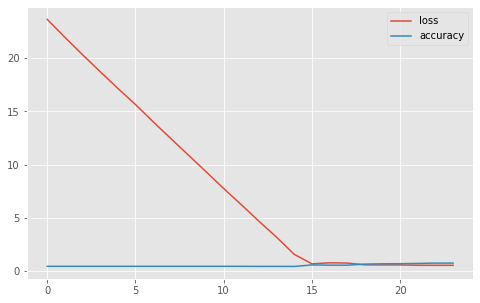

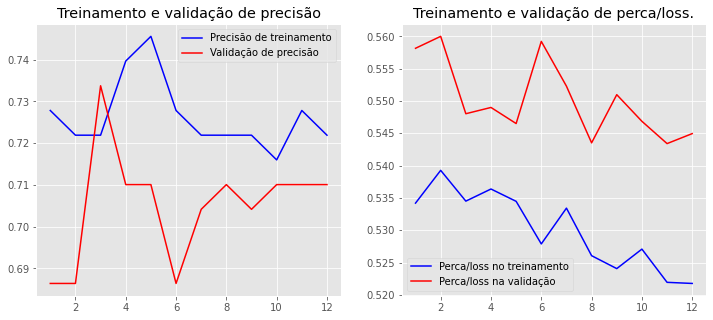

In [35]:
import matplotlib.pyplot as plot
from plot_history_helper import plot_history

# Treinando o modelo.
history = model.fit(
  X_train,
  y_train,
  epochs=24,
  verbose=False,
)

pd.DataFrame(history.history).plot(figsize=(8,5))
plot.show()

# Treinando o modelo.
history = model.fit(
  X_train,
  y_train,
  epochs=12,
  verbose=False,
  validation_data=(X_test, y_test),
  batch_size=20
)

plot_history(history)


In [36]:
clear_session()

loss, accuracy = model.evaluate(X_train, y_train, verbose=1)
print(f"Previsão no treinamento: {accuracy}")
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Previsão no teste: {accuracy}")

6/6 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.7219
Previsão no treinamento: 0.7218934893608093
6/6 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.7101
Previsão no teste: 0.7100591659545898
